# Майнор по Анализу Данных, Группа ИАД-5
## Домашнее задание №3 
## Деревья решений, случайный лес

<hr\>
**Общая информация**

**Срок сдачи:** 07 июня 2017, 23:59 <br\>

При отправлении ДЗ на почту `hse.minor.dm+5@gmail.com` указывайте фамилию в названии файла, а тему письма оформляйте в следующем виде:<br\>
** [ИАД-5] *{Фамилия}* *{Имя}* ДЗ*{Номер}* **<br\>

Сопровождайте ваш код изображеними, комментариями и выводами. <br\>
Иммейте ввиду, что на некоторые задачи нет единственного верного и полного ответа. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше.

Если вы используете код из общего доступа - просьба сопровождать комментариями и ссылками. В случае совпадения кода и отсутствия ссылок будет выставляться 0 за задание.

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Classify leaf with random forest

Задание основано на Kaggle соревновании [Leaf Classification](https://www.kaggle.com/c/leaf-classification/).

Помните [Iris](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)? Данные, с которыми вам предстоит работать в этом задании концептуально похожи на ирисы.

Дана информация о 990 листьях, каждый из которых был сорван с одного из 99 видов растений.</br> 
Необходимо построить модель, которая могла бы определить, к какому растению относится каждый лист.

## Табличные данные

Загрузите файл `table_data.csv`.

В нем вы можете найти
* id - идентификатор листика
* species - столбец с названием растения (класс)
* margin, shape, texture - некоторые признаки листьев

In [20]:
DATA_DIR = os.path.join('data')
IMG_DIR = os.path.join(DATA_DIR, 'images')

In [21]:
filepath = os.path.join(DATA_DIR, 'table_data.csv')
table_data = pd.read_csv('table_data.csv')
table_data.head(10)

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.00000,0.000000,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.00000,0.000000,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.00000,0.000000,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.00000,0.000000,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.031250
5,8,Magnolia_Salicifolia,0.070312,0.093750,0.033203,0.001953,0.000000,0.152340,0.007812,0.0,...,0.145510,0.000000,0.041992,0.000000,0.005859,0.00000,0.000000,0.000000,0.001953,0.013672
6,10,Quercus_Canariensis,0.021484,0.031250,0.017578,0.009766,0.001953,0.042969,0.039062,0.0,...,0.085938,0.000000,0.040039,0.000000,0.009766,0.00000,0.000000,0.000000,0.039062,0.003906
7,11,Quercus_Rubra,0.000000,0.000000,0.037109,0.050781,0.003906,0.000000,0.003906,0.0,...,0.038086,0.025391,0.009766,0.002930,0.021484,0.00000,0.037109,0.006836,0.002930,0.036133
8,14,Quercus_Brantii,0.005859,0.001953,0.033203,0.015625,0.001953,0.000000,0.023438,0.0,...,0.000000,0.000000,0.008789,0.000000,0.017578,0.00000,0.000000,0.000977,0.033203,0.074219
9,15,Salix_Fragilis,0.000000,0.000000,0.009766,0.037109,0.072266,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.070312,0.013672,0.19238,0.000000,0.074219,0.000000,0.000000


## Создание контрольного и обучающих множеств (1 балл)

* Задайте `random_seed`, который необходимо будет использовать при **всех** случаях использования генератора случайных чисел
* С помощью LabelEncoder закодируйте столбец `species` из исходных данных - вы должны получить одномерный numpy массив с метками классов от 0 до 98
* В переменную `X` запишите значения признаков margin, shape, texture - вы должны получить многомерный numpy массив

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
random_seed = 228

In [24]:
Species = table_data['species']
Species = Species.reshape(-1)
Species = LabelEncoder().fit_transform(Species)
Species

array([ 3, 49, 65, 94, 84, 40, 54, 78, 53, 89, 98, 16, 74, 50, 58, 31, 43,
        4, 75, 44, 83, 84, 13, 66, 15,  6, 73, 22, 73, 31, 36, 27, 94, 88,
       12, 28, 21, 25, 20, 60, 84, 65, 69, 58, 23, 76, 18, 52, 54,  9, 48,
       47, 64, 81, 83, 36, 58, 21, 81, 20, 62, 88, 34, 92, 79, 82, 20, 32,
        4, 84, 36, 35, 72, 60, 71, 72, 52, 50, 54, 11, 51, 18, 47,  5,  8,
       37, 97, 20, 33,  1, 59,  1, 56,  1,  9, 57, 20, 79, 29, 16, 32, 54,
       93, 10, 46, 59, 84, 76, 15, 10, 15,  0, 69,  4, 51, 51, 94, 36, 39,
       62,  2, 24, 26, 35, 25, 87,  0, 55, 34, 38,  1, 45,  7, 93, 56, 38,
       21, 51, 75, 81, 74, 33, 20, 37,  9, 40, 60, 31, 83, 50, 71, 67, 30,
       66,  1, 43, 61, 23, 65, 84, 87, 46, 57, 16,  2, 28, 12, 96, 44, 76,
       29, 75, 41, 87, 67, 61, 30,  5, 12, 62,  3, 83, 81,  6, 85,  4, 37,
       57, 84, 39, 71, 61,  6, 76, 14, 31, 98, 40, 17, 51, 16, 42, 63, 86,
       37, 69, 86, 71, 80, 78, 14, 35, 25,  5, 39,  8,  9, 26, 44, 60, 13,
       14, 77, 13, 80, 87

In [25]:
table_data1 = table_data

In [26]:
table_data1 = table_data1.drop(['id','species'], axis = 1, inplace = False)

In [27]:
X = table_data1
X = np.array(X)
X.shape

(990, 192)

* Случайным образом разбейте данные на обучающую и контрольную выборку, причем так, чтобы в контрольной выборке содержалось по 2 объекта каждого класса.
* Сохраните индексы объектов обучающего и контрольного множеств в переменные train_idx и test_idx

#### Hint
[Это](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html#sklearn.model_selection.StratifiedShuffleSplit) может помочь.

In [28]:
from sklearn.cross_validation import StratifiedShuffleSplit

In [29]:
spl = StratifiedShuffleSplit(Species, 1, test_size=0.2 , random_state = random_seed)

for train_index, test_index in spl:
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Species[train_index], Species[test_index]
    train_id, test_id = table_data['id'][train_index], table_data['id'][test_index]
#y_test = pd.DataFrame(y_test)
#y_test.shape
#ниже проверка, что действительно по 2 класса
#bb = []
#for i in range(1,198): 
    #bb.append(1)
#bb = pd.DataFrame(bb)
#y_test['1'] = bb
#y_test.groupby(0)['1'].count()

In [30]:
np.sort(y_test)

array([ 0,  0,  1,  1,  2,  2,  3,  3,  4,  4,  5,  5,  6,  6,  7,  7,  8,
        8,  9,  9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16,
       17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24, 24, 25,
       25, 26, 26, 27, 27, 28, 28, 29, 29, 30, 30, 31, 31, 32, 32, 33, 33,
       34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42,
       42, 43, 43, 44, 44, 45, 45, 46, 46, 47, 47, 48, 48, 49, 49, 50, 50,
       51, 51, 52, 52, 53, 53, 54, 54, 55, 55, 56, 56, 57, 57, 58, 58, 59,
       59, 60, 60, 61, 61, 62, 62, 63, 63, 64, 64, 65, 65, 66, 66, 67, 67,
       68, 68, 69, 69, 70, 70, 71, 71, 72, 72, 73, 73, 74, 74, 75, 75, 76,
       76, 77, 77, 78, 78, 79, 79, 80, 80, 81, 81, 82, 82, 83, 83, 84, 84,
       85, 85, 86, 86, 87, 87, 88, 88, 89, 89, 90, 90, 91, 91, 92, 92, 93,
       93, 94, 94, 95, 95, 96, 96, 97, 97, 98, 98], dtype=int64)

In [31]:
y_test = pd.DataFrame(y_test)
y_test.shape

(198, 1)

In [32]:
train_idx = train_index
test_idx = test_index

## Сравнение RF, DT и Bagging'а (2 балла)

На кросс-валидации по обучающей выборке сравните качество и скорость
1. Обычного дерева решений 
2. Bagging'a над деревьями решений с 10, 50, 100, 200 и 300 деревьями
3. Cлучайного леса с 10, 50, 100, 200 и 300 деревьями


* Изобразите полученные результаты на одном графике
* Используйте `StratifiedKFold` с 4 фолдами для оценки качества
* Мера качества - `accuracy`

In [33]:
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
dtc = DecisionTreeClassifier(random_state = random_seed)
skf = StratifiedKFold(n_splits=4, random_state = random_seed)

In [21]:
import time
scorer = []
timer = []
results_dtc = pd.DataFrame()
start_time = time.time()
Mean_Accuracy_KFolds_dtc = 0
i=0
for train_index, test_index in skf.split(X_train, y_train):
    i += 1
    X_train_cv, X_test_cv = X_train[train_index], X_train[test_index]
    y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]
    
    dtc.fit(X_train_cv,y_train_cv)
    pred_answ_dtc = dtc.predict(X_test_cv)
    pred_answ_dtc = pd.DataFrame(pred_answ_dtc)
    DTC_score = accuracy_score(y_test_cv,pred_answ_dtc)
    Mean_Accuracy_KFolds_dtc += DTC_score
    print('DTC accuracy ',i,' = ',DTC_score)

end_time = time.time()
print('Mean DTC accuracy = ',Mean_Accuracy_KFolds_dtc/4)
print('Time =',(end_time - start_time))
timer.append((end_time - start_time)/4)
scorer.append((Mean_Accuracy_KFolds_dtc/4))
timer = pd.DataFrame(timer)
scorer = pd.DataFrame(scorer)
results_dtc['Time'] = timer
results_dtc['Accuracy'] = scorer
results_dtc['Number of trees'] = 1
results_dtc

DTC accuracy  1  =  0.560606060606
DTC accuracy  2  =  0.606060606061
DTC accuracy  3  =  0.636363636364
DTC accuracy  4  =  0.621212121212
Mean DTC accuracy =  0.606060606061
Time = 1.8932609558105469


,Time,Accuracy,Number of trees
0,0.473315,0.606061,1


In [22]:
from sklearn.ensemble import BaggingClassifier
scorer = []
timer = []
NTr = []
results_bgg = pd.DataFrame()
for p in [10,50,100,200,300]:
    start_time = time.time()
    bgg = BaggingClassifier(DecisionTreeClassifier(random_state = random_seed), n_estimators = p,random_state = random_seed)
    Mean_Accuracy_KFolds_bgg = 0
    i = 0
    for train_index, test_index in skf.split(X_train, y_train):
        i += 1
        X_train_cv, X_test_cv = X_train[train_index], X_train[test_index]
        y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]
    
        bgg.fit(X_train_cv,y_train_cv)
        pred_answ_bgg = bgg.predict(X_test_cv)
        pred_answ_bgg = pd.DataFrame(pred_answ_bgg)
        BGG_score = accuracy_score(y_test_cv,pred_answ_bgg)
        Mean_Accuracy_KFolds_bgg += BGG_score
        print('BGG accuracy ',i,',',p,' = ',BGG_score)
    end_time = time.time()
    print('Time',p,'=',(end_time - start_time))
    print('Mean BGG accuracy = ',Mean_Accuracy_KFolds_bgg/4)
    timer.append((end_time - start_time)/4)
    scorer.append((Mean_Accuracy_KFolds_bgg/4))
    NTr.append(p)
    
results_bgg['Time'] = timer
results_bgg['Accuracy'] = scorer
results_bgg['Number of trees'] = NTr
results_bgg

BGG accuracy  1 , 10  =  0.79797979798
BGG accuracy  2 , 10  =  0.787878787879
BGG accuracy  3 , 10  =  0.762626262626
BGG accuracy  4 , 10  =  0.79797979798
Time 10 = 15.30521273612976
Mean BGG accuracy =  0.786616161616
BGG accuracy  1 , 50  =  0.944444444444
BGG accuracy  2 , 50  =  0.873737373737
BGG accuracy  3 , 50  =  0.929292929293
BGG accuracy  4 , 50  =  0.909090909091
Time 50 = 75.09267091751099
Mean BGG accuracy =  0.914141414141
BGG accuracy  1 , 100  =  0.924242424242
BGG accuracy  2 , 100  =  0.909090909091
BGG accuracy  3 , 100  =  0.944444444444
BGG accuracy  4 , 100  =  0.939393939394
Time 100 = 152.28440380096436
Mean BGG accuracy =  0.929292929293
BGG accuracy  1 , 200  =  0.934343434343
BGG accuracy  2 , 200  =  0.909090909091
BGG accuracy  3 , 200  =  0.944444444444
BGG accuracy  4 , 200  =  0.944444444444
Time 200 = 322.94839358329773
Mean BGG accuracy =  0.933080808081
BGG accuracy  1 , 300  =  0.944444444444
BGG accuracy  2 , 300  =  0.909090909091
BGG accuracy

,Time,Accuracy,Number of trees
0,3.826303,0.786616,10
1,18.773168,0.914141,50
2,38.071101,0.929293,100
3,80.737098,0.933081,200
4,114.045530,0.935606,300


In [15]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
scorer = []
timer = []
NTr = []
results_rfc = pd.DataFrame()
for p in [10,50,100,200,300]:
    start_time = time.time()
    rfc = RandomForestClassifier(p, random_state = random_seed)
    Mean_Accuracy_KFolds_rfc = 0
    i = 0
    for train_index, test_index in skf.split(X_train, y_train):
        i += 1
        X_train_cv, X_test_cv = X_train[train_index], X_train[test_index]
        y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]
    
        rfc.fit(X_train_cv,y_train_cv)
        pred_answ_rfc = rfc.predict(X_test_cv)
        pred_answ_rfc = pd.DataFrame(pred_answ_rfc)
        RFC_score = accuracy_score(y_test_cv,pred_answ_rfc)
        Mean_Accuracy_KFolds_rfc += RFC_score
        print('RFC accuracy ',i,',',p,' = ',RFC_score)
    end_time = time.time()
    print('Time',p,'=',(end_time - start_time))
    print('Mean RFC accuracy = ',Mean_Accuracy_KFolds_rfc/4)
    timer.append((end_time - start_time)/4)
    scorer.append((Mean_Accuracy_KFolds_rfc/4))
    NTr.append(p)
    
results_rfc['Time'] = timer
results_rfc['Accuracy'] = scorer
results_rfc['Number of trees'] = NTr
results_rfc

RFC accuracy  1 , 10  =  0.853535353535
RFC accuracy  2 , 10  =  0.863636363636
RFC accuracy  3 , 10  =  0.818181818182
RFC accuracy  4 , 10  =  0.873737373737
Time 10 = 0.8945963382720947
Mean RFC accuracy =  0.852272727273
RFC accuracy  1 , 50  =  0.969696969697
RFC accuracy  2 , 50  =  0.954545454545
RFC accuracy  3 , 50  =  0.969696969697
RFC accuracy  4 , 50  =  0.964646464646
Time 50 = 4.1357574462890625
Mean RFC accuracy =  0.964646464646
RFC accuracy  1 , 100  =  0.979797979798
RFC accuracy  2 , 100  =  0.974747474747
RFC accuracy  3 , 100  =  0.979797979798
RFC accuracy  4 , 100  =  0.974747474747
Time 100 = 9.152106523513794
Mean RFC accuracy =  0.977272727273
RFC accuracy  1 , 200  =  0.979797979798
RFC accuracy  2 , 200  =  0.964646464646
RFC accuracy  3 , 200  =  0.979797979798
RFC accuracy  4 , 200  =  0.979797979798
Time 200 = 16.86025071144104
Mean RFC accuracy =  0.97601010101
RFC accuracy  1 , 300  =  0.979797979798
RFC accuracy  2 , 300  =  0.964646464646
RFC accurac

,Time,Accuracy,Number of trees
0,0.223649,0.852273,10
1,1.033939,0.964646,50
2,2.288027,0.977273,100
3,4.215063,0.976010,200
4,6.327479,0.977273,300


In [25]:
results = pd.DataFrame()
results['Trees №'] = results_bgg['Number of trees']
results['Time Bagging'] = results_bgg['Time']
results['Accuracy Bagging'] = results_bgg['Accuracy']
results['Time RF'] = results_rfc['Time']
results['Accuracy RF'] = results_rfc['Accuracy']
results

,Trees №,Time Bagging,Accuracy Bagging,Time RF,Accuracy RF
0,10,3.826303,0.786616,0.223649,0.852273
1,50,18.773168,0.914141,1.033939,0.964646
2,100,38.071101,0.929293,2.288027,0.977273
3,200,80.737098,0.933081,4.215063,0.976010
4,300,114.045530,0.935606,6.327479,0.977273


In [26]:
results_dtc_1 = pd.DataFrame()
results_dtc_1['Trees №'] = results_bgg['Number of trees']
results_dtc_1['Accuracy DTC'] = results_dtc['Accuracy']
results_dtc_1['Time DTC'] = results_dtc['Time']
for i in range(0,5):
    results_dtc_1['Accuracy DTC'][i] = results_dtc['Accuracy']
    results_dtc_1['Time DTC'][i] = results_dtc['Time']
results_dtc_1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Trees №,Accuracy DTC,Time DTC
0,10,0.606061,0.473315
1,50,0.606061,0.473315
2,100,0.606061,0.473315
3,200,0.606061,0.473315
4,300,0.606061,0.473315


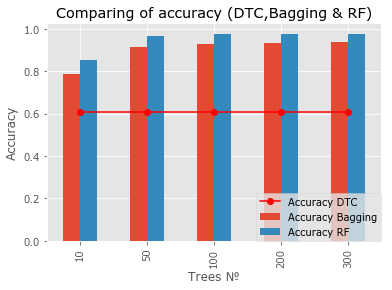

In [27]:
# https://stackoverflow.com/questions/23482201/plot-pandas-dataframe-as-bar-and-line-on-the-same-one-chart
# https://matplotlib.org/users/legend_guide.html
ax = results_dtc_1['Accuracy DTC'].plot(x=results['Trees №'], linestyle='-', color = 'red',marker='o')
results[['Accuracy Bagging','Accuracy RF']].plot(x=results['Trees №'], kind='bar', ax=ax)
plt.legend(['Accuracy DTC','Accuracy Bagging','Accuracy RF'],loc=4, borderaxespad=0.)
plt.ylabel('Accuracy')
plt.title('Comparing of accuracy (DTC,Bagging & RF)')

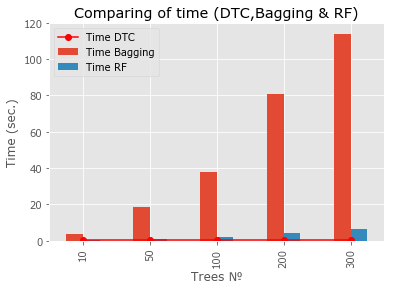

In [28]:
# https://stackoverflow.com/questions/23482201/plot-pandas-dataframe-as-bar-and-line-on-the-same-one-chart
ax = results_dtc_1['Time DTC'].plot(x=results['Trees №'], linestyle='-', color = 'red',marker='o')
results[['Time Bagging','Time RF']].plot(x=results['Trees №'], kind='bar', ax=ax)
plt.legend(['Time DTC','Time Bagging','Time RF'])
plt.ylabel('Time (sec.)')
plt.title('Comparing of time (DTC,Bagging & RF)')

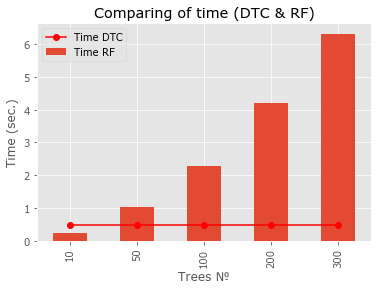

In [29]:
# Тут лучше визуализируется время DTC и RF
# https://stackoverflow.com/questions/23482201/plot-pandas-dataframe-as-bar-and-line-on-the-same-one-chart
ax = results_dtc_1['Time DTC'].plot(x=results['Trees №'], linestyle='-', color = 'red',marker='o')
results[['Time RF']].plot(x= results['Trees №'], kind='bar', ax=ax)
plt.legend(['Time DTC','Time RF'])
plt.ylabel('Time (sec.)')
plt.title('Comparing of time (DTC & RF)')

# Изображения листьев

В папке `images` лежат 1584 изображения различного размера, названные в соответствии с id из файла `table_data.csv`.

In [34]:
filepath = os.path.join(IMG_DIR, '3.jpg')
img = plt.imread(filepath)

In [35]:
img.shape

(456, 691)

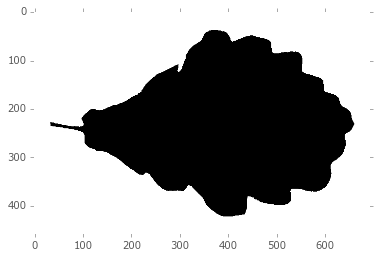

In [36]:
plt.imshow(img, cmap='Greys')
plt.grid(None)

## Загрузка изображений (1 балла)

Необходимо
1. "Стандартизировать" размер изображений - сделать его одинаковым для всех
2. Отобрать изображения тех листьев, которые представлены в `table_data`

Пункт 1. можно сделать двумя способами:
* C помощью функции scipy.misc.imresize (неидеальный вариант)
* Найти максимальные длинну и ширину полотна и перенести исходные картинки в центр (кажется, что так лучше)

В результате этого задания вы должны получить получить массив изображений IMG_train и IMG_test для обучающей и контрольной выборки.

In [37]:
from scipy.misc import imresize

In [38]:
img_resized = imresize(img, (100, 100))

In [39]:
n = []
n1 = []
for l in range(1,1585):
    n.append(str(l))
    n1.append(l)
len(n)

1584

In [40]:
img_cont = []
for p in n:
    filepath = os.path.join(IMG_DIR, p+'.jpg')
    img = plt.imread(filepath)
    img_resized = imresize(img, (100, 100))
    img_resized = img_resized.reshape(-1)
    img_cont.append(img_resized)
img_cont

[array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dt

In [41]:
test_id = np.array(test_id)
train_id = np.array(train_id)

In [42]:
IMG_test = []
for l in test_id:
    IMG_test.append(img_cont[l-1])
IMG_train = []
for l in train_id:
    IMG_train.append(img_cont[l-1])

In [43]:
IMG_test = pd.DataFrame(IMG_test)
IMG_test['id'] = test_id
IMG_train = pd.DataFrame(IMG_train)
IMG_train['id'] = train_id

In [60]:
IMG_train.head(5)

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
IMG_test.head(5)

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,id
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,163
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,278
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,265
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,867
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,787


In [42]:
IMG_test = IMG_test.drop('id', axis = 1)

In [43]:
IMG_train = IMG_train.drop('id', axis = 1)

## TSNE (2 балла)

* Переформатируйте IMG_train и IMG_test к виду "матрица объект-признак" (команда reshape) !!!Сделано в предыдущем пункте!!!
* На данных в X_train и IMG_train (по отдельности) изобразите результат применения T-SNE со следующими настройками: `n_components=2, perplexity=[5,10,20,30,50], method='exact', n_iter=5000, learning_rate=500`. 
* У вас должно получится 10 `scatter-plot` графиков с точками, расскашенными в цвет своего класса (для наглядности в `plt.scatter` укажите `cmap=plt.cm.Paired`)
* В каком случае (X_train или IMG_train) кластеры выделяются лучше? Как вы думаете, почему?


In [44]:
import matplotlib.cm as cm
from sklearn.manifold import TSNE

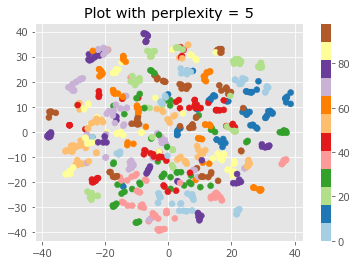

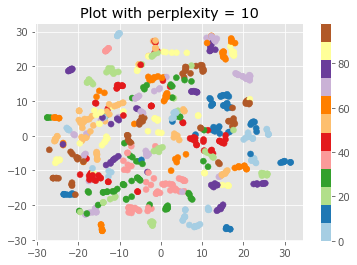

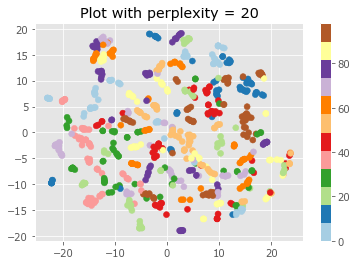

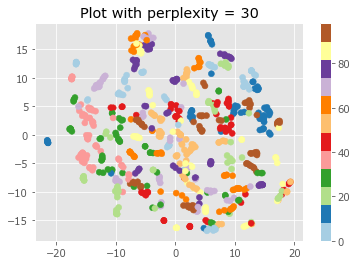

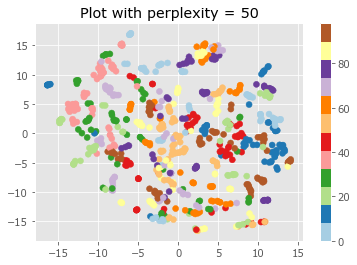

In [45]:
#источник: https://indico.io/blog/visualizing-with-t-sne/
for x in [5,10,20,30,50]:    
    X_tsne = TSNE(n_components=2, perplexity= x , method='exact', n_iter=5000, learning_rate=500, random_state = random_seed).fit_transform(X_train)
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train, cmap=plt.cm.Paired)
    plt.title('Plot with perplexity = '+str(x))
    plt.colorbar()
    plt.show()

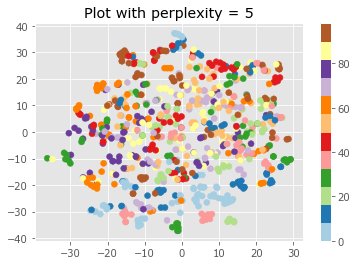

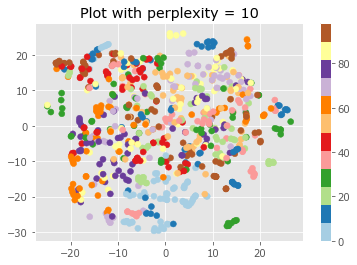

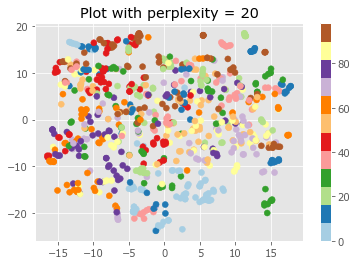

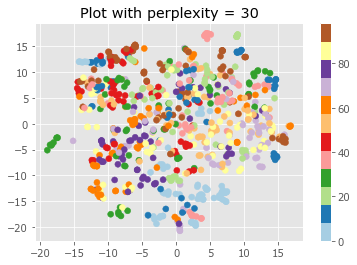

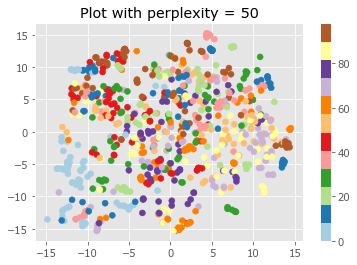

In [46]:
#источник: https://indico.io/blog/visualizing-with-t-sne/
for x in [5,10,20,30,50]:    
    X_tsne1 = TSNE(n_components=2, perplexity= x , method='exact', n_iter=5000, learning_rate=500, random_state = random_seed).fit_transform(IMG_train)
    plt.scatter(X_tsne1[:, 0], X_tsne1[:, 1], c=y_train, cmap=plt.cm.Paired)
    plt.title('Plot with perplexity = '+str(x))
    plt.colorbar()
    plt.show()

В случае работы с X_train кластеры выделяются лучше, что может быть связано с качеством признаков находящихся в табличных данный. То есть, информативность признаков в табличных данных выше, чем признаков, выделенных из изображений (ч/б) листов.

## PCA (1 балл)

* Используйте метод главных компонент, чтобы перейти к пространству меньшей размерности. Подберите количество компонент так, чтобы доля объясненной дисперсии составляла 60%
* Используя результаты МГК на кросс-валидации сравните качество
    1. Обычного дерева решений 
    2. Bagging'a над деревьями решений с 10, 50, 100, 200 и 300 деревьями
    3. Cлучайного леса с 10, 50, 100, 200 и 300 деревьями
    
#### Hint
Составьте [`Pipeline`](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) из PCA и предиктивной модели

In [47]:
from sklearn.decomposition import PCA

In [50]:
for i in range(1,10001):
    pca = PCA(n_components= i, random_state = random_seed)
    pca.fit(IMG_train)
    variance = pca.explained_variance_ratio_.sum()
    if variance >= 0.6:
        print('Explained variance =',variance)
        print('Number of components =',i)
        break

Explained variance = 0.601313309235
Number of components = 12


In [52]:
pca = PCA(n_components= 12, random_state = random_seed)
pca.fit(IMG_train)
IMG_train_pca = pca.transform(IMG_train)

## DTC

In [53]:
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
dtc = DecisionTreeClassifier(random_state = random_seed)
skf = StratifiedKFold(n_splits=4, random_state = 1411)
import time
scorer = []
timer = []
results_dtc_pca = pd.DataFrame()
start_time = time.time()
Mean_Accuracy_KFolds_dtc = 0
i=0
for train_index, test_index in skf.split(IMG_train_pca, y_train):
    i += 1
    X_train_cv, X_test_cv = IMG_train_pca[train_index], IMG_train_pca[test_index]
    y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]
    
    dtc.fit(X_train_cv,y_train_cv)
    pred_answ_dtc = dtc.predict(X_test_cv)
    pred_answ_dtc = pd.DataFrame(pred_answ_dtc)
    DTC_score = accuracy_score(y_test_cv,pred_answ_dtc)
    Mean_Accuracy_KFolds_dtc += DTC_score
    print('DTC accuracy ',i,' = ',DTC_score)

end_time = time.time()
print('Mean DTC accuracy = ',Mean_Accuracy_KFolds_dtc/4)
print('Time =',(end_time - start_time))
timer.append((end_time - start_time)/4)
scorer.append((Mean_Accuracy_KFolds_dtc/4))
timer = pd.DataFrame(timer)
scorer = pd.DataFrame(scorer)
results_dtc_pca['Time'] = timer
results_dtc_pca['Accuracy'] = scorer
results_dtc_pca['Number of trees'] = 1
results_dtc_pca

DTC accuracy  1  =  0.292929292929
DTC accuracy  2  =  0.282828282828
DTC accuracy  3  =  0.358585858586
DTC accuracy  4  =  0.358585858586
Mean DTC accuracy =  0.323232323232
Time = 0.2671782970428467


,Time,Accuracy,Number of trees
0,0.066795,0.323232,1


## Bagging

In [54]:
from sklearn.ensemble import BaggingClassifier
scorer = []
timer = []
NTr = []
results_bgg_pca = pd.DataFrame()
for p in [10,50,100,200,300]:
    start_time = time.time()
    bgg = BaggingClassifier(DecisionTreeClassifier(), n_estimators = p, random_state = random_seed)
    Mean_Accuracy_KFolds_bgg = 0
    i = 0
    for train_index, test_index in skf.split(IMG_train_pca, y_train):
        i += 1
        X_train_cv, X_test_cv = IMG_train_pca[train_index], IMG_train_pca[test_index]
        y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]
    
        bgg.fit(X_train_cv,y_train_cv)
        pred_answ_bgg = bgg.predict(X_test_cv)
        pred_answ_bgg = pd.DataFrame(pred_answ_bgg)
        BGG_score = accuracy_score(y_test_cv,pred_answ_bgg)
        Mean_Accuracy_KFolds_bgg += BGG_score
        print('BGG accuracy ',i,',',p,' = ',BGG_score)
    end_time = time.time()
    print('Time',p,'=',(end_time - start_time))
    print('Mean BGG accuracy = ',Mean_Accuracy_KFolds_bgg/4)
    timer.append((end_time - start_time)/4)
    scorer.append((Mean_Accuracy_KFolds_bgg/4))
    NTr.append(p)
    
results_bgg_pca['Time'] = timer
results_bgg_pca['Accuracy'] = scorer
results_bgg_pca['Number of trees'] = NTr
results_bgg_pca

BGG accuracy  1 , 10  =  0.388888888889
BGG accuracy  2 , 10  =  0.439393939394
BGG accuracy  3 , 10  =  0.40404040404
BGG accuracy  4 , 10  =  0.378787878788
Time 10 = 1.7501678466796875
Mean BGG accuracy =  0.402777777778
BGG accuracy  1 , 50  =  0.459595959596
BGG accuracy  2 , 50  =  0.489898989899
BGG accuracy  3 , 50  =  0.474747474747
BGG accuracy  4 , 50  =  0.469696969697
Time 50 = 6.5313591957092285
Mean BGG accuracy =  0.473484848485
BGG accuracy  1 , 100  =  0.459595959596
BGG accuracy  2 , 100  =  0.494949494949
BGG accuracy  3 , 100  =  0.494949494949
BGG accuracy  4 , 100  =  0.469696969697
Time 100 = 12.441302299499512
Mean BGG accuracy =  0.479797979798
BGG accuracy  1 , 200  =  0.444444444444
BGG accuracy  2 , 200  =  0.494949494949
BGG accuracy  3 , 200  =  0.5
BGG accuracy  4 , 200  =  0.464646464646
Time 200 = 25.018690586090088
Mean BGG accuracy =  0.47601010101
BGG accuracy  1 , 300  =  0.444444444444
BGG accuracy  2 , 300  =  0.5
BGG accuracy  3 , 300  =  0.4949

,Time,Accuracy,Number of trees
0,0.437542,0.402778,10
1,1.632840,0.473485,50
2,3.110326,0.479798,100
3,6.254673,0.476010,200
4,9.239415,0.477273,300


## RF

In [55]:
from sklearn.ensemble import RandomForestClassifier
scorer = []
timer = []
NTr = []
results_rfc_pca = pd.DataFrame()
for p in [10,50,100,200,300]:
    start_time = time.time()
    rfc = RandomForestClassifier(p, random_state = random_seed)
    Mean_Accuracy_KFolds_rfc = 0
    i = 0
    for train_index, test_index in skf.split(IMG_train_pca, y_train):
        i += 1
        X_train_cv, X_test_cv = IMG_train_pca[train_index], IMG_train_pca[test_index]
        y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]
    
        rfc.fit(X_train_cv,y_train_cv)
        pred_answ_rfc = rfc.predict(X_test_cv)
        pred_answ_rfc = pd.DataFrame(pred_answ_rfc)
        RFC_score = accuracy_score(y_test_cv,pred_answ_rfc)
        Mean_Accuracy_KFolds_rfc += RFC_score
        print('RFC accuracy ',i,',',p,' = ',RFC_score)
    end_time = time.time()
    print('Time',p,'=',(end_time - start_time))
    print('Mean RFC accuracy = ',Mean_Accuracy_KFolds_rfc/4)
    timer.append((end_time - start_time)/4)
    scorer.append((Mean_Accuracy_KFolds_rfc/4))
    NTr.append(p)
    
results_rfc_pca['Time'] = timer
results_rfc_pca['Accuracy'] = scorer
results_rfc_pca['Number of trees'] = NTr
results_rfc_pca

RFC accuracy  1 , 10  =  0.378787878788
RFC accuracy  2 , 10  =  0.464646464646
RFC accuracy  3 , 10  =  0.383838383838
RFC accuracy  4 , 10  =  0.358585858586
Time 10 = 0.5193488597869873
Mean RFC accuracy =  0.396464646465
RFC accuracy  1 , 50  =  0.449494949495
RFC accuracy  2 , 50  =  0.520202020202
RFC accuracy  3 , 50  =  0.459595959596
RFC accuracy  4 , 50  =  0.444444444444
Time 50 = 2.803867816925049
Mean RFC accuracy =  0.468434343434
RFC accuracy  1 , 100  =  0.449494949495
RFC accuracy  2 , 100  =  0.520202020202
RFC accuracy  3 , 100  =  0.515151515152
RFC accuracy  4 , 100  =  0.484848484848
Time 100 = 5.027356147766113
Mean RFC accuracy =  0.492424242424
RFC accuracy  1 , 200  =  0.459595959596
RFC accuracy  2 , 200  =  0.545454545455
RFC accuracy  3 , 200  =  0.520202020202
RFC accuracy  4 , 200  =  0.454545454545
Time 200 = 8.871918678283691
Mean RFC accuracy =  0.494949494949
RFC accuracy  1 , 300  =  0.469696969697
RFC accuracy  2 , 300  =  0.540404040404
RFC accurac

,Time,Accuracy,Number of trees
0,0.129837,0.396465,10
1,0.700967,0.468434,50
2,1.256839,0.492424,100
3,2.217980,0.494949,200
4,3.180372,0.497475,300


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


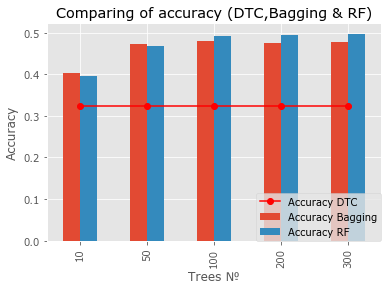

In [56]:
results_pca = pd.DataFrame()
results_pca['Trees №'] = results_bgg_pca['Number of trees']
results_pca['Time Bagging'] = results_bgg_pca['Time']
results_pca['Accuracy Bagging'] = results_bgg_pca['Accuracy']
results_pca['Time RF'] = results_rfc_pca['Time']
results_pca['Accuracy RF'] = results_rfc_pca['Accuracy']
results_dtc_1_pca = pd.DataFrame()
results_dtc_1_pca['Trees №'] = results_bgg_pca['Number of trees']
results_dtc_1_pca['Accuracy DTC'] = results_dtc_pca['Accuracy']
results_dtc_1_pca['Time DTC'] = results_dtc_pca['Time']
for i in range(0,5):
    results_dtc_1_pca['Accuracy DTC'][i] = results_dtc_pca['Accuracy']
    results_dtc_1_pca['Time DTC'][i] = results_dtc_pca['Time']
# https://stackoverflow.com/questions/23482201/plot-pandas-dataframe-as-bar-and-line-on-the-same-one-chart
# https://matplotlib.org/users/legend_guide.html
ax = results_dtc_1_pca['Accuracy DTC'].plot(x=results_pca['Trees №'], linestyle='-', color = 'red',marker='o')
results_pca[['Accuracy Bagging','Accuracy RF']].plot(x=results_pca['Trees №'], kind='bar', ax=ax)
plt.legend(['Accuracy DTC','Accuracy Bagging','Accuracy RF'],loc=4, borderaxespad=0.)
plt.ylabel('Accuracy')
plt.title('Comparing of accuracy (DTC,Bagging & RF)')

# Подбор гиперпараметров модели на табличных данных (2 балла)

С помощью `GridSearchCV` или `RandomizedSearchCV` подберите параметры для случайного леса

* Используйте `StratifiedKFold` на 4х фолдах
* Мера качества - `accuracy`

In [44]:
#http://scikit-learn.org/stable/auto_examples/model_selection/randomized_search.html
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


rfc0 = RandomForestClassifier(random_state = random_seed)
param_grid = {'n_estimators':[10, 50, 100, 200, 300], 'max_depth':[3,5,10,20], 'max_features':[30, 'sqrt', 'log2']}

grid_search = GridSearchCV(rfc0, cv = StratifiedKFold(n_splits=4, random_state = 228), param_grid=param_grid, scoring = 'accuracy')
grid_search.fit(X_train, y_train)
#еще можно сделать аналогично GridSearch по этим параметрам (например): "min_samples_split": [2, 3, 10], "min_samples_leaf": [1, 3, 10]
grid_search.best_params_

{'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 200}

# Проверка на контрольной выборке (1 балл)

* Примените оптимальную модель на контрольной выборке
* Для нескольких случаев, где была допущена ошибка, выведите истинное изображение листа и одно из изображений листа предсказанного класса

In [45]:
rfc1 = RandomForestClassifier(n_estimators = 200, max_features = "sqrt", random_state = random_seed)
rfc1.fit(X_train,y_train)
pred_answ_rfc1 = rfc1.predict(X_test)
pred_answ_rfc1 = pd.DataFrame(pred_answ_rfc1)
RFC1_score = accuracy_score(y_test,pred_answ_rfc1)
print('Accuracy with best params =',RFC1_score)

Accuracy with best params = 1.0


In [63]:
y_test1 = []
y_test1 = pd.DataFrame(y_test1)
y_test = pd.DataFrame(y_test)
y_test1 = y_test

In [64]:
y_test1['1']= pred_answ_rfc1
wrong_ind = []
for i in range(0,198):
    if y_test1['1'][i] != y_test1[0][i]:
        wrong_ind.append(i)
y_test = y_test.drop('1',axis=1)
wrong_ind

[4, 32]

In [66]:
print('Wrong answers:')
print('Real:','\n',y_test1[0][wrong_ind],'\n')
print('Predicted:','\n',y_test1['1'][wrong_ind])

Wrong answers:
Real: 
 4     96
32    73
Name: 0, dtype: int64 

Predicted: 
 4     43
32    92
Name: 1, dtype: int64


In [19]:
test_id = pd.DataFrame(list(test_id))

Two predicted(left) and two real(right) leaves


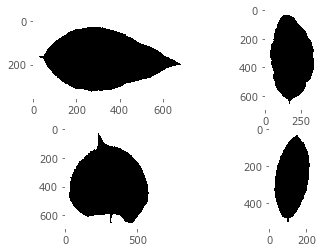

In [68]:
pic_ind_real = list(test_id[0][wrong_ind])
wrong_val = list(y_test1['1'][wrong_ind])
for i in range(0,len(Species)+1):
    if Species[i] == wrong_val[0]:
        break
for i1 in range(0,len(Species)+1):
    if Species[i1] == wrong_val[1]:
        break
w1 = str(table_data['id'][i])
w2 = str(table_data['id'][i1])

print('Two predicted(left) and two real(right) leaves')


f, ax = plt.subplots(2, 2)

filepath = os.path.join(IMG_DIR, w1+'.jpg')
img = plt.imread(filepath)
ax[0,0].imshow(img, cmap='Greys')
ax[0,0].grid(None)

filepath = os.path.join(IMG_DIR, str(pic_ind_real[0])+'.jpg')
img = plt.imread(filepath)
ax[0,1].imshow(img, cmap='Greys')
ax[0,1].grid(None)


filepath = os.path.join(IMG_DIR, w2+'.jpg')
img = plt.imread(filepath)
ax[1,0].imshow(img, cmap='Greys')
ax[1,0].grid(None)

filepath = os.path.join(IMG_DIR, str(pic_ind_real[1])+'.jpg')
img = plt.imread(filepath)
ax[1,1].imshow(img, cmap='Greys')
ax[1,1].grid(None)

# Подбор гиперпараметров модели на объединенных данных (2 балла) **

За это задание можно получить 2 дополнительных балла, но сделать его надо безукоризненно =)

Сейчас мы попробуем использовать данные с изображений и табличные данные, которые затем пойдут на вход случайному лесу. Далее надо будет подобрать оптимальные гиперпараметры случайного леса с помощью кросс-валидации

## Объединяем данные

* Составьте матрицу A_train (A_test) как результаты конкатенации матриц X_train и IMG_train (X_test и IMG_test)

In [69]:
# https://pythonworld.ru/numpy/2.html
IMG_train = np.array(IMG_train)
X_train = np.array(X_train)
A_train = np.hstack((X_train, IMG_train))

IMG_test = np.array(IMG_test)
X_test = np.array(X_test)
A_test = np.hstack((X_test, IMG_test))

In [1]:
pd.DataFrame(A_train).head(5)

NameError: name 'pd' is not defined

In [71]:
pd.DataFrame(A_test).head(5)

,0,1,2,3,4,5,6,7,8,9,...,10182,10183,10184,10185,10186,10187,10188,10189,10190,10191
0,0.000000,0.000000,0.074219,0.056641,0.007812,0.000000,0.000000,0.0,0.009766,0.005859,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.007812,0.013672,0.076172,0.003906,0.019531,0.009766,0.005859,0.0,0.005859,0.011719,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.052734,0.078125,0.005859,0.007812,0.000000,0.091797,0.007812,0.0,0.011719,0.019531,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.005859,0.009766,0.025391,0.011719,0.029297,0.013672,0.019531,0.0,0.005859,0.013672,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.027344,0.041016,0.048828,0.017578,0.005859,0.041016,0.074219,0.0,0.007812,0.056641,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Составим  Pipeline

Наш Pipeline условно изображен на рисунке ниже:

<center><img src='scheme.png'></center>


Из объединенных данных в матрице `А` 
1. Выбираются столбцы, которые относятся к изображению и передаются в `PCA`
2. Исходные табличные данные отделяются от всех остальных, но остаются без изменений
3. Результаты пунктов 1 и 2 объединяются
4. И передаются на вход в случайный лес

В результате в переменную model вы должны записать весь Pipeline из шагов 1-4

#### Hints
* Для того, чтобы выбирать столбцы из матрицы `А` можно использовать `FunctionTransformer` (см. пример ниже)
* Для того, чтобы объединять результаты преобразований можно использовать [`FeatureUnion`](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.FeatureUnion.html)

In [72]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline

# http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
# теория и принципы построения Pipeline на основе: https://youtu.be/7l_WQO3JbWE

In [73]:
def select_col_idx(X, col_idx):
    return X[:, col_idx]

In [74]:
#Шаг 1 Выбираются столбцы, которые относятся к изображению и передаются в PCA
# http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
IMG_table = FunctionTransformer(select_col_idx, kw_args={'col_idx': np.arange(0,10000,1)})
pipe1 = Pipeline(steps = [('IMG Data', IMG_table),('PCA', pca)])
#Шаг 2 Исходные табличные данные отделяются от всех остальных, но остаются без изменений
Table_table = FunctionTransformer(select_col_idx, kw_args={'col_idx': np.arange(0,192,1)})
#Шаг 3 Результаты пунктов 1 и 2 объединяются
# http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.FeatureUnion.html
pipe2 = FeatureUnion([('IMG Data after PCA', pipe1 ),('Table Data', Table_table)])
# Шаг 4 И передаются на вход в случайный лес
# https://youtu.be/7l_WQO3JbWE
# В результате в переменную model вы должны записать весь Pipeline из шагов 1-4
model = Pipeline(steps = [('All Data', pipe2),('rfc', RandomForestClassifier(random_state = random_seed))])

In [ ]:
# не стал компилировать, но можно было сделать так:

#http://scikit-learn.org/stable/auto_examples/model_selection/randomized_search.html
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

param_grid = {'rfc__n_estimators' : [10,50,100,200,300],
              "rfc__max_depth": [2,6,9,10,None],
              "rfc__bootstrap": [True, False], 
              "rfc__criterion": ["gini", "entropy"]}

grid_search_add = GridSearchCV(model, cv = StratifiedKFold(n_splits=4, random_state = 1411), param_grid=param_grid, scoring = 'accuracy')
grid_search_add.fit(A_train, y_train)
#еще можно сделать аналогично GridSearch по этим параметрам (например): "max_features": [1, 3, 10], "min_samples_split": [2, 3, 10], "min_samples_leaf": [1, 3, 10]
report(grid_search_add.cv_results_)

In [75]:
# сделаю кросс-валидацию

scorer = []
timer = []
NTr = []
results_rfc_add = pd.DataFrame()
skf = StratifiedKFold(n_splits=4, random_state = 1411)
for p in [10,50,100,200,300]:
    start_time = time.time()
    model = Pipeline(steps = [('All Data', pipe2),('rfc', RandomForestClassifier(p, random_state = random_seed))])
    Mean_Accuracy_KFolds_rfc = 0
    i = 0
    for train_index, test_index in skf.split(A_train, y_train):
        i += 1
        X_train_cv, X_test_cv = A_train[train_index], A_train[test_index]
        y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]
    
        model.fit(X_train_cv,y_train_cv)
        pred_answ_rfc = model.predict(X_test_cv)
        pred_answ_rfc = pd.DataFrame(pred_answ_rfc)
        RFC_score = accuracy_score(y_test_cv,pred_answ_rfc)
        Mean_Accuracy_KFolds_rfc += RFC_score
        print('RFC accuracy ',i,',',p,' = ',RFC_score)
    end_time = time.time()
    print('Time',p,'=',(end_time - start_time))
    print('Mean RFC accuracy = ',Mean_Accuracy_KFolds_rfc/4)
    timer.append((end_time - start_time)/4)
    scorer.append((Mean_Accuracy_KFolds_rfc/4))
    NTr.append(p)
    
results_rfc_add['Time'] = timer
results_rfc_add['Accuracy'] = scorer
results_rfc_add['Number of trees'] = NTr
results_rfc_add

RFC accuracy  1 , 10  =  0.843434343434
RFC accuracy  2 , 10  =  0.858585858586
RFC accuracy  3 , 10  =  0.843434343434
RFC accuracy  4 , 10  =  0.818181818182
Time 10 = 5.407613039016724
Mean RFC accuracy =  0.840909090909
RFC accuracy  1 , 50  =  0.979797979798
RFC accuracy  2 , 50  =  0.989898989899
RFC accuracy  3 , 50  =  0.969696969697
RFC accuracy  4 , 50  =  0.964646464646
Time 50 = 8.647766590118408
Mean RFC accuracy =  0.97601010101
RFC accuracy  1 , 100  =  0.974747474747
RFC accuracy  2 , 100  =  0.994949494949
RFC accuracy  3 , 100  =  0.989898989899
RFC accuracy  4 , 100  =  0.974747474747
Time 100 = 16.677364587783813
Mean RFC accuracy =  0.983585858586
RFC accuracy  1 , 200  =  0.979797979798
RFC accuracy  2 , 200  =  0.989898989899
RFC accuracy  3 , 200  =  0.989898989899
RFC accuracy  4 , 200  =  0.979797979798
Time 200 = 25.13176989555359
Mean RFC accuracy =  0.984848484848
RFC accuracy  1 , 300  =  0.984848484848
RFC accuracy  2 , 300  =  0.994949494949
RFC accuracy

,Time,Accuracy,Number of trees
0,1.351903,0.840909,10
1,2.161942,0.976010,50
2,4.169341,0.983586,100
3,6.282942,0.984848,200
4,8.504322,0.987374,300


Таким образом, оптимально использовать n_estimators = 300.

## Проверка на контрольной выборке

* Примените оптимальную модель на контрольной выборке
* Сравните качество с моделью на табличных данных

In [78]:
# тут работаю с параметром, найденным по фолдам
model = Pipeline(steps = [('All Data', pipe2),('rfc', RandomForestClassifier(300, random_state = random_seed))])
model.fit(A_train,y_train)
pred_answ_rfc_add = model.predict(A_test)
pred_answ_rfc_add = pd.DataFrame(pred_answ_rfc_add)
RFC_score_add = accuracy_score(y_test,pred_answ_rfc_add)

In [79]:
# тут работаю с параметрами, найденными с помощью GridSearch в предыдущем номере
model = Pipeline(steps = [('All Data', pipe2),('rfc', RandomForestClassifier(n_estimators = 300,
                              max_depth = None,
                              bootstrap = True,
                              criterion = 'gini',max_features = 1, random_state = random_seed))])
model.fit(A_train,y_train)
pred_answ_rfc_add1 = model.predict(A_test)
pred_answ_rfc_add1 = pd.DataFrame(pred_answ_rfc_add1)
RFC_score_add1 = accuracy_score(y_test,pred_answ_rfc_add1)

Работаем по всем данным с параметром n_estimators = 300
Accuracy =  0.984848484848
Работаем по всем данным с параметрами из предыдущего номера
Accuracy =  0.989898989899
Качество модели на табличных значениях
Accuracy =  0.989898989899


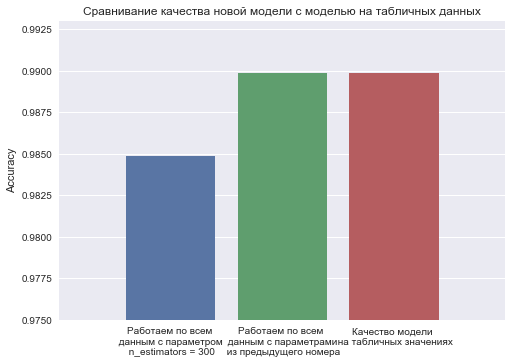

In [80]:
import seaborn as sns

print('Работаем по всем данным с параметром n_estimators = 300')
print('Accuracy = ', RFC_score_add)
print('Работаем по всем данным с параметрами из предыдущего номера')
print('Accuracy = ', RFC_score_add1)
print('Качество модели на табличных значениях')
print('Accuracy = ', RFC1_score)

sns.barplot(['Работаем по всем \n данным с параметром \n n_estimators = 300','Работаем по всем \n данным с параметрами \n из предыдущего номера','Качество модели \n на табличных значениях'],[RFC_score_add,RFC_score_add1,RFC1_score])
plt.axis([-1, 3, 0.975, 0.993])
plt.ylabel('Accuracy')
plt.title('Сравнивание качества новой модели с моделью на табличных данных')